# **MIE 1624 - ASSIGNMENT 2**

Student Name - Ayesha Patnaik\
Student ID - 1008681696

Importing Relevant Packages

In [1]:
#Importing Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,f1_score

## **Part-1 Data Cleaning**

In [2]:
#Importing file
maindf = pd.read_csv("/content/clean_kaggle_data_2022.csv", encoding = 'unicode_escape' ) #encoding included to solve unicode decode problem.
maindf.head(20) # reading the file

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"
5,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,13.0,"200,000-299,999"
6,10619,30-34,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,12.0,"150,000-199,999"
7,587,50-54,Man,Singapore,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,"90,000-99,999"
8,676,25-29,Man,Italy,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,3.0,"30,000-39,999"
9,542,30-34,Man,Taiwan,No,NaN,NaN,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"


In [3]:
#See how many null values in each column to have a brief idea
maindf.isnull().sum(axis=0)


Duration (in seconds)       0
Q2                          0
Q3                          0
Q4                          0
Q5                          0
                         ... 
Q44_10                   7370
Q44_11                   7731
Q44_12                   7820
Q29_Encoded                 1
Q29_buckets                 1
Length: 298, dtype: int64

From the above results, we infer that there a lot of NaN values in this dataframe.
Futhermore, we identify the nature of the questions and categorize them. Each of these categories will be handled differently. The categories are as follows:

1. Catgeorical questions with order.
2. Multiple choice questions
3. Miscellenaeous (Remaining)


Next observing from the dataframe, I see that there are columns from the MCQ questions that have specifically "Other" as the recorded response.

In this data cleaning part, I do the following cleaning in order:

1. I drop label 0 as it contains the questions which we are not interested in 
2. I check for the time taken by participants to do the survey. If for some participants the duration is less than a minute, I will not consider that response. This is because the information provided for 44 questions in less than a minute may not be thoughtful and can be considered unreliabale. Will later that column.
3.  Then, I remove columns that are more than 80% empty as they have no significant information to contribute.
4.   Next, I check for columns that contain only "Other" as responses and drop those columns. This is because I can't derive any conclusions from that column.
5. Next, I identify categorial questions with order. I replace the NaN values for these wiht their mode and do ordinal encoding.
6. Then I identify all the multiple-choice-questions. I replace the NaN values with 0 and encode non-NaN values with 1.
7. For rest of the questions, I identify their potential as categorical data and impute the missing data with their mode values and then give categorical code to each response.



Before we do the above three tasks, we do a basic reset of the dataframe in the next code block.

**Dropping Duration Column** 

In [4]:
#dropping label 0 as it contains the questions which we are not interested in
df = maindf.drop(labels=0, axis=0)


In [5]:
#Checking minimum duration of time 
min(df['Duration (in seconds)'].astype(None).values)

134.0

Since the minimum response time is more than 2 minutes, all the observations are considered reliable. In addition, we drop the "Duration (in seconds)" column now, as there is no relation between the response time and target variable. Hence we do not need it for our upcoming model implementation.

In [6]:
#Dropping "Duration (in seconds)" column
df = df.drop(['Duration (in seconds)'], axis=1)

In [7]:
df

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,Udacity,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,Udacity,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"
5,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,Udacity,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
8133,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8134,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8135,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"


**Dropping column that are more than 80% empty**

In [8]:
#Next I will drop columns that have almost 80% empty values
empty_80 = [] 
n80 = 0.8*df.shape[0]
for col in df.columns:
    n_nan = df[col].isnull().sum()
    if n_nan >= n80 :
        empty_80.append(col)
        df.drop([col], axis=1, inplace = True)
print("Number of remaining columns:", df.shape[1])
print('Number of columns deleted:', len(empty_80))
print("The following columns are dropped")
print ('\n'.join(empty_80))

Number of remaining columns: 78
Number of columns deleted: 219
The following columns are dropped
Q6_2
Q6_4
Q6_5
Q6_6
Q6_8
Q6_9
Q6_11
Q7_3
Q7_6
Q7_7
Q10_1
Q10_2
Q10_3
Q12_4
Q12_5
Q12_6
Q12_7
Q12_8
Q12_9
Q12_10
Q12_11
Q12_12
Q12_13
Q12_14
Q12_15
Q13_2
Q13_3
Q13_6
Q13_8
Q13_9
Q13_10
Q13_12
Q13_13
Q13_14
Q14_3
Q14_4
Q14_5
Q14_6
Q14_7
Q14_8
Q14_9
Q14_10
Q14_11
Q14_12
Q14_13
Q14_14
Q14_16
Q15_5
Q15_6
Q15_7
Q15_8
Q15_9
Q15_10
Q15_11
Q15_12
Q15_13
Q15_14
Q15_15
Q17_5
Q17_7
Q17_8
Q17_9
Q17_10
Q17_11
Q17_12
Q17_13
Q17_14
Q17_15
Q18_4
Q18_5
Q18_6
Q18_8
Q18_9
Q18_10
Q18_11
Q18_12
Q18_13
Q18_14
Q19_1
Q19_2
Q19_3
Q19_4
Q19_5
Q19_6
Q19_7
Q19_8
Q20_1
Q20_2
Q20_3
Q20_4
Q20_5
Q20_6
Q21_1
Q21_2
Q21_3
Q21_4
Q21_5
Q21_6
Q21_7
Q21_10
Q22
Q28_6
Q28_7
Q28_8
Q31_2
Q31_4
Q31_5
Q31_6
Q31_7
Q31_8
Q31_9
Q31_10
Q31_11
Q31_12
Q33_1
Q33_2
Q33_3
Q33_4
Q33_5
Q34_1
Q34_2
Q34_3
Q34_4
Q34_5
Q34_6
Q34_7
Q34_8
Q35_2
Q35_3
Q35_4
Q35_5
Q35_6
Q35_7
Q35_8
Q35_9
Q35_10
Q35_11
Q35_12
Q35_13
Q35_14
Q35_15
Q35_16
Q36_1
Q36_2
Q36_3


**Dropping columns with "Other" responses**

In [9]:
#Dropping the remaining columns with "Other" as reponses
Other_columns = ['Q6_12']
df = df.drop(Other_columns, axis=1)
df

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded,Q29_buckets
1,55-59,Man,France,No,Coursera,Kaggle Learn Courses,Udemy,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,2-5 times,Twitter (data science influencers),NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,2.0,"20,000-29,999"
2,30-34,Man,Germany,No,Coursera,NaN,Udemy,NaN,University courses,"Online courses (Coursera, EdX, etc)",...,NaN,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,No,Coursera,Kaggle Learn Courses,NaN,NaN,NaN,NaN,...,Never,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,40-44,Man,United States of America,No,Coursera,Kaggle Learn Courses,Udemy,NaN,University courses,"Online courses (Coursera, EdX, etc)",...,2-5 times,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,13.0,"200,000-299,999"
5,40-44,Man,United States of America,No,Coursera,NaN,Udemy,NaN,University courses,NaN,...,More than 25 times,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,No,NaN,Kaggle Learn Courses,NaN,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,NaN,Twitter (data science influencers),NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,10.0,"100,000-124,999"
8133,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,Never,NaN,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,0.0,"0-9,999"
8134,40-44,Man,India,No,NaN,NaN,Udemy,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,NaN,NaN,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,0.0,"0-9,999"
8135,25-29,Man,Turkey,No,NaN,NaN,Udemy,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,Never,Twitter (data science influencers),NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,2.0,"20,000-29,999"


In [10]:
# 'Q29' and 'Q29_buckets' are be dropped as we already have a label encoded column to replace it which is 'Q29_Encoded' 
df.drop(['Q29','Q29_buckets'], axis=1, inplace=True)
df.head()
     

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
1,55-59,Man,France,No,Coursera,Kaggle Learn Courses,Udemy,NaN,NaN,"Online courses (Coursera, EdX, etc)",...,NaN,2-5 times,Twitter (data science influencers),NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,2.0
2,30-34,Man,Germany,No,Coursera,NaN,Udemy,NaN,University courses,"Online courses (Coursera, EdX, etc)",...,NaN,NaN,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,10.0
3,70+,Man,Australia,No,Coursera,Kaggle Learn Courses,NaN,NaN,NaN,NaN,...,None,Never,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,NaN,NaN,10.0
4,40-44,Man,United States of America,No,Coursera,Kaggle Learn Courses,Udemy,NaN,University courses,"Online courses (Coursera, EdX, etc)",...,NaN,2-5 times,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,13.0
5,40-44,Man,United States of America,No,Coursera,NaN,Udemy,NaN,University courses,NaN,...,NaN,More than 25 times,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",13.0


**Handling Categorical Questions with Order**

After going through al the survey question from the file "kaggle_survey_2022_answer_choices", I identify the following 8 as categorical data with order:
Q8, Q11, Q16, Q25, Q26, Q29, Q30, Q43.

But we removed Q29 above. So there are 7 categorical data with order that needs to be attended.

In [11]:
categoricdata = ['Q8','Q11','Q16','Q25','Q26','Q30','Q43']
maindf.loc[0,categoricdata] #using main dataframe to access the questions

Q8     What is the highest level of formal education ...
Q11    For how many years have you been writing code ...
Q16    For how many years have you used machine learn...
Q25    What is the size of the company where you are ...
Q26    Approximately how many individuals are respons...
Q30    Approximately how much money have you spent on...
Q43    Approximately how many times have you used a T...
Name: 0, dtype: object

In [12]:
#checking number of NaN values in these columns
print(df[categoricdata].isna().sum())

Q8        0
Q11       0
Q16     684
Q25       0
Q26       0
Q30      50
Q43    3723
dtype: int64


I am going to check the distribution of the data in each of these columns. If the distibution is not highly skewed, then I will replace the values with the most frequent response, or in other words, the mode of the categorical data.

In [13]:
#checking the distribution of each categorical column
a = df['Q8'].value_counts(normalize=True) # the distribution of Q8

b = df[df['Q16'].isnull()]['Q8'].value_counts(normalize=True) #the distribution of Q8 responses where the responses in Q16 are Null
c = df[df['Q30'].isnull()]['Q8'].value_counts(normalize=True) #the distribution of Q8 responses where the responses in Q30 are Null
d = df[df['Q43'].isnull()]['Q8'].value_counts(normalize=True) #the distribution of Q8 responses where the responses in Q43 are Null

print (pd.DataFrame({'Alldata': a, 'NaN Q16':b, 'NaN Q30':c, 'NaN Q43':d})) # to check if there is a difference

                                                     Alldata   NaN Q16  \
BachelorEEs degree                               0.246436  0.334795   
Doctoral degree                                     0.165806  0.089181   
I prefer not to answer                              0.052360  0.093567   
MasterEEs degree                                 0.438422  0.349415   
No formal education past high school                0.025320  0.035088   
Professional doctorate                              0.034292  0.021930   
Some college/university study without earning a...  0.037365  0.076023   

                                                    NaN Q30   NaN Q43  
BachelorEEs degree                                  0.28  0.290626  
Doctoral degree                                        0.12  0.137524  
I prefer not to answer                                 0.08  0.061778  
MasterEEs degree                                    0.44  0.404512  
No formal education past high school           

Analyzing the values above, we see there is no significant difference between the values. So we proceed to fill the missing values with mode.

In [14]:
#Replacing NaN values with mode
df.fillna({x: df.loc[:,x].mode()[0] for x in categoricdata}, inplace=True)
print(df[categoricdata].isna().sum()) #checking for NaN values 

Q8     0
Q11    0
Q16    0
Q25    0
Q26    0
Q30    0
Q43    0
dtype: int64


**Ordinal Encoding**

Now since the data are ordinal categorical , we will use ordinal encoding that converts each label into integer values and the encoded data represents the sequence of labels.

**Q8: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?**

The education level will be encoded and labeled from low to high numerically. "I prefer not to answer" will be treated as missing values and be replaced by mode, so that we can include it in one of the classes.
     

In [15]:
#Removing 'I prefer not to answer'
df['Q8'].replace({'I prefer not to answer' : df['Q8'].mode().values} , inplace=True)
print(df['Q8'])
print('NAN value in Q8:', df['Q8'].isna().sum())



1       Some college/university study without earning ...
2                                   BachelorEEs degree
3                                         Doctoral degree
4                                         Doctoral degree
5                                     MasterEEs degree
                              ...                        
8132                                  MasterEEs degree
8133                                  MasterEEs degree
8134                                BachelorEEs degree
8135                                  MasterEEs degree
8136                                      Doctoral degree
Name: Q8, Length: 8136, dtype: object
NAN value in Q8: 0


In [16]:
df['Q8'].unique() #to obtain the exact value names in the dataframe 

array(['Some college/university study without earning a bachelor\x81E\x80\x81Es degree',
       'Bachelor\x81E\x80\x81Es degree', 'Doctoral degree',
       'Master\x81E\x80\x81Es degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

Since the encoding for the values are different than literature English, I found out the unique values and assigned those values to labels. The labels are given in increasing order of education level where "No formal education past high school" is the lowest (0) and "Professional doctorate" is the highest (5)

In [17]:
#Ordinal Encoding of Q8 column
Q8_encoded = {
    'No formal education past high school' : 0,
    'Some college/university study without earning a bachelor\x81E\x80\x81Es degree' : 1,
    'Bachelor\x81E\x80\x81Es degree' : 2,
    'Master\x81E\x80\x81Es degree' : 3,
    'Doctoral degree' : 4,
    'Professional doctorate' : 5
}

df['Q8'] = df['Q8'].map(Q8_encoded)
df['Q8']
     


1       1
2       2
3       4
4       4
5       3
       ..
8132    3
8133    3
8134    2
8135    3
8136    4
Name: Q8, Length: 8136, dtype: int64

In [18]:
df['Q8'].unique() #rechecking the classes

array([1, 2, 4, 3, 0, 5])

We do similar exercise for other columns.

**Q11 : For how many years have you been writing code and/or programming?**

In [19]:
#checking the unique responses
df["Q11"].unique()

array(['10-20 years', '20+ years', '5-10 years', '3-5 years', '< 1 years',
       '1-3 years', 'I have never written code'], dtype=object)

In [20]:
#Encoding and Labelling
Q11_encoded = {
    'I have never written code': 0,
    '< 1 years' : 1,
    '1-3 years': 2,
    '3-5 years': 3,
    '5-10 years': 4,
    '10-20 years': 5,
    '20+ years': 6
}

df["Q11"] = df["Q11"].map(Q11_encoded)
df["Q11"]

1       5
2       5
3       6
4       5
5       5
       ..
8132    5
8133    2
8134    2
8135    1
8136    3
Name: Q11, Length: 8136, dtype: int64

The labels are given in increasing order of experience in programming where "I have never written code" is the lowest (0) and "20+ years" is the highest (6).

In [21]:
#confirming new labels
df["Q11"].unique()

array([5, 6, 4, 3, 1, 2, 0])

**Q16 : For how many years have you used machine learning methods?**

In [22]:
#checking unique responses
df["Q16"].unique()

array(['1-2 years', '4-5 years', '5-10 years', '2-3 years',
       'Under 1 year', '3-4 years', '10-20 years',
       'I do not use machine learning methods'], dtype=object)

In [23]:
#Encoding and labelling
Q16_encoded = {
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7,
    '20 or more years': 8
}

df["Q16"] = df["Q16"].map(Q16_encoded)
df["Q16"]

1       2
2       5
3       6
4       6
5       6
       ..
8132    1
8133    2
8134    0
8135    1
8136    1
Name: Q16, Length: 8136, dtype: int64

In [24]:
#checking for any null value to confirm
df["Q16"].isna().sum()

0

In [25]:
#confirming new labels creates
df["Q16"].unique()

array([2, 5, 6, 3, 1, 4, 7, 0])

The labels are given in increasing order of experience in machine learning methods where "I do not use machine learning methods" is the lowest (0) and "20 or more years" is the highest (8).

**Note** : We observe from the unique values (before and after encoding) that no responders were recorded who had an exoerience for more than 20 years. So we have unique values from 0 to 7.

**Q25 : What is the size of the company where you are employed?**

In [26]:
#checking unique values
df["Q25"].unique()

array(['0-49 employees', '250-999 employees', '1000-9,999 employees',
       '50-249 employees', '10,000 or more employees'], dtype=object)

In [27]:
#Encoding and Labelling
Q25_encoded = {
    '0-49 employees': 0,
    '50-249 employees': 1,
    '250-999 employees': 2,
    '1000-9,999 employees': 3,
    '10,000 or more employees': 4
}

df["Q25"] = df["Q25"].map(Q25_encoded)
df["Q25"]

1       0
2       2
3       3
4       3
5       3
       ..
8132    4
8133    4
8134    0
8135    4
8136    0
Name: Q25, Length: 8136, dtype: int64

The labels are given in increasing order of size of employees where "0-49 employees" is the lowest (0) and "10,000 or more employees" is the highest (4).

**Q26 : Approximately how many individuals are responsible for data science workloads at your place of business?**


In [28]:
#checking unique values
df["Q26"].unique()

array(['2-Jan', '20+', '4-Mar', '9-May', '0', '14-Oct', '15-19'],
      dtype=object)

From the "kaggle_survey_2022_answer_choices" file we know the options are:


*   0
*   1-2
*   3-4
*   5-9
*  10-14
*   15-19
*    20+


But from the unique responses we see the some of the values got encoded in month-date format. So we understand that:


*   2-Jan means 1-2
*   4-Mar means 3-4
*   9-May means 5-9
*   14-Oct means 10-14


Keeping the above rational in mind, we do the ordinal coding below.







In [29]:
#Encoding and labelling
Q26_encoded = {
    '0': 0,
    '2-Jan': 1, #for 1-2
    '4-Mar': 2, #for 3-4
    '9-May': 3, #for 5-9
    '14-Oct': 4, #for 10-14
    '15-19': 5,
    '20+': 6
}

df["Q26"] = df["Q26"] .map(Q26_encoded)
df["Q26"] 

1       1
2       6
3       6
4       6
5       2
       ..
8132    6
8133    1
8134    0
8135    0
8136    0
Name: Q26, Length: 8136, dtype: int64

In [30]:
#confirming the new labels
df["Q26"].unique()

array([1, 6, 2, 3, 0, 4, 5])

The labels are given in increasing order of number of responsible data scientist employees where "0" is the lowest (0) and "20+" is the highest (6).

**Q30 : Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?**


In [31]:
#checking unique values
df["Q30"].unique()

array(['$1000-$9,999', '$0 ($USD)', '$100-$999',
       '$100,000 or more ($USD)', '$1-$99', '$10,000-$99,999'],
      dtype=object)

In [32]:
#Encoding and labelling
Q30_encoded ={
    "$0 ($USD)": 0,
    "$1-$99" : 1,
    "$100-$999" :2,
    "$1000-$9,999" : 3,
    "$10,000-$99,999":4,
    "$100,000 or more ($USD)" : 5

}

df["Q30"] = df["Q30"].map(Q30_encoded)
df["Q30"]

1       3
2       0
3       2
4       2
5       5
       ..
8132    0
8133    2
8134    1
8135    2
8136    0
Name: Q30, Length: 8136, dtype: int64

In [33]:
#confirming new unique labels
df["Q30"].unique()

array([3, 0, 2, 5, 1, 4])

The labels are given in increasing order of number of expenses where "0 USD" is the lowest (0) and "100,000 or more USD" is the highest (5).

**Q43 : Approximately how many times have you used a TPU (tensor processing unit)?**


In [34]:
#check for unique responses
df["Q43"].unique()

array(['2-5 times', 'Never', 'More than 25 times', 'Once', '6-25 times'],
      dtype=object)

In [35]:
#Encoding and labelling
Q43_encoded = {
    'Never': 0,
    'Once': 1,
    '2-5 times': 2,
    '6-25 times' : 3,
    'More than 25 times': 4
}

df["Q43"] = df["Q43"].map(Q43_encoded)
df["Q43"]

1       2
2       0
3       0
4       2
5       4
       ..
8132    0
8133    0
8134    0
8135    0
8136    0
Name: Q43, Length: 8136, dtype: int64

In [36]:
#checking unique classes
df["Q43"].unique()

array([2, 0, 4, 1, 3])

The labels are given in increasing order of number of frequencies where "Never" is the lowest (0) and "More than 25 times" is the highest (4).

**Handling MCQ questions**

The MCQ questions are identified and stored in a list below.

In [37]:
MCQ=['Q6_1','Q6_3','Q6_7','Q6_10',
     'Q7_1','Q7_2','Q7_4','Q7_5',
     'Q12_1', 'Q12_2','Q12_3',
     'Q13_1','Q13_4','Q13_5','Q13_7','Q13_11',
     'Q14_1','Q14_2','Q14_15',
     'Q15_1','Q15_2','Q15_3','Q15_4',
     'Q17_1','Q17_2','Q17_3','Q17_4','Q17_6',
     'Q18_1','Q18_2','Q18_3','Q18_7',
     'Q21_8','Q21_9',
     'Q28_1', 'Q28_2','Q28_3','Q28_4','Q28_5',
     'Q31_1','Q31_3',
     'Q35_1',
     'Q36_5','Q36_14',
     'Q37_12',
     'Q38_7',
     'Q39_11',
     'Q40_14',
     'Q41_8',
     'Q42_1','Q42_8',
     'Q44_1','Q44_2','Q44_4','Q44_5','Q44_6','Q44_8','Q44_9']


Since every choice of a MCQ question is listed as a column, only the choice selected is filled in the respective column for that particular participant. Rest all columns are NaN. So we will label the columns having non-null response as 1 and rest of the null columns as 0 for easier usage.

In [38]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-38-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [39]:
# Filling the missing value with zero
df_2 = df[MCQ]
df_2 = df_2.fillna(0)
# Filling the non missing value with one
df_2[df_2 !=0] = 1
df[MCQ] = df_2
df

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
1,55-59,Man,France,No,1,1,1,0,0,1,...,0,2,1,0,1,1,0,1,0,2.0
2,30-34,Man,Germany,No,1,0,1,0,1,1,...,0,0,1,1,0,0,1,1,0,10.0
3,70+,Man,Australia,No,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.0
4,40-44,Man,United States of America,No,1,1,1,0,1,1,...,0,2,1,1,0,0,0,1,0,13.0
5,40-44,Man,United States of America,No,1,0,1,0,1,0,...,0,4,0,0,0,0,0,1,1,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,No,0,1,0,0,0,1,...,0,0,1,0,1,0,1,1,0,10.0
8133,35-39,Man,India,No,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0.0
8134,40-44,Man,India,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.0
8135,25-29,Man,Turkey,No,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,2.0


**Encoding Remaining Data**

The remaining data that can be treated as categorical are:\
Q2 What is your age (# years)?,\
Q3 What is your gender?,\
Q4 In which country do you currently reside?,\
Q5 Are you currently a student?,\
Q9 Have you ever published any academic research?,\
Q23 Select the title most similar to your current role,\
Q24 In what industry is your current employer/contract,\
Q27 Does your current employer incorporate machine learning methods into their business?,\
Q32 Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?

Here we impute the missing values with the mode of the column as they can be treated as categorical in nature and then give categorical code to each response.




In [40]:
remaining_data = ['Q2','Q3','Q4','Q5','Q9','Q23','Q24','Q27','Q32']

#Imputing missing values with mode

for col in remaining_data:
    df.loc[:,col] = df.loc[:,col].fillna(df.loc[:,col].mode()[0])
    df.loc[:,col] = df.loc[:,col].astype('category')
    df.loc[:,col] = df.loc[:,col].cat.codes #labels assigned by astype('category).cat.codes

df
     

,Q2,Q3,Q4,Q5,Q6_1,Q6_3,Q6_7,Q6_10,Q7_1,Q7_2,...,Q42_8,Q43,Q44_1,Q44_2,Q44_4,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
1,8,0,15,0,1,1,1,0,0,1,...,0,2,1,0,1,1,0,1,0,2.0
2,3,0,16,0,1,0,1,0,1,1,...,0,0,1,1,0,0,1,1,0,10.0
3,10,0,2,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.0
4,5,0,55,0,1,1,1,0,1,1,...,0,2,1,1,0,0,0,1,0,13.0
5,5,0,55,0,1,0,1,0,1,0,...,0,4,0,0,0,0,0,1,1,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5,0,55,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,1,0,10.0
8133,4,0,20,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0.0
8134,5,0,20,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.0
8135,2,0,51,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,2.0


Reference for the above "cat.codes" code : https://datascience.stackexchange.com/questions/79636/how-to-play-with-cat-codes-and-get-dummies

In [41]:
df["Q5"].unique() #dispplaying unique contents in Q5.

array([0], dtype=int8)

In [42]:
#Since Q5 include all samples who are not students currently, we drop it
df.drop(['Q5'], axis=1, inplace=True)


In [43]:
#Final shape of my dataset
df.shape

(8136, 74)

## **Part-2 Exploratory Data Analysis**

Explain how feature engineering is a useful tool in machine learning in the context of the tasks in this assignment:

In this assignment, we are going to use ordinal logistic regression using the cleaned data. However, even after cleaning, data contains some raw data that might be irrelevant, redundant, or noisy which in turn will adversely affect the performance of the machine learning model. Therefore, it is essential to perform feature engineering to extract or select useful features from raw data. Objective is to improve the accuracy and efficiency of machine learning models.



To carry out the feature importance, I am going to use pearsopn's correlation plot and then do feature selection by chi-squared independence test


In [44]:
#summary of the dataframe
df.describe()

,Q2,Q3,Q4,Q8,Q9,Q11,Q16,Q23,Q24,Q25,Q26,Q27,Q30,Q32,Q43,Q29_Encoded
count,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000,8136.000000
mean,4.057276,0.706981,30.676254,2.837266,0.689897,3.125369,2.550885,6.551008,5.189405,2.048181,2.850910,2.260447,1.512414,1.900074,0.501352,3.760570
std,2.254581,1.507834,16.382457,0.948880,0.462564,1.838539,2.088365,3.911951,4.313515,1.496282,2.203148,1.572470,1.361005,2.694020,0.995379,4.356735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.000000,2.000000,0.000000,2.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,0.000000,26.000000,3.000000,1.000000,3.000000,2.000000,7.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000
75%,5.000000,0.000000,46.000000,3.000000,1.000000,5.000000,4.000000,10.000000,9.000000,3.000000,6.000000,3.000000,3.000000,1.000000,0.000000,7.000000
max,10.000000,4.000000,57.000000,5.000000,1.000000,6.000000,7.000000,13.000000,14.000000,4.000000,6.000000,5.000000,5.000000,12.000000,4.000000,14.000000


In [45]:
#Inspecting target variable
df["Q29_Encoded"].value_counts(normalize=True) #to see as percentage value

0.0     0.375860
1.0     0.097345
2.0     0.075467
3.0     0.057030
4.0     0.051745
10.0    0.049656
5.0     0.044985
12.0    0.042035
6.0     0.039086
7.0     0.035521
11.0    0.033063
13.0    0.028638
8.0     0.027286
9.0     0.024213
14.0    0.018068
Name: Q29_Encoded, dtype: float64

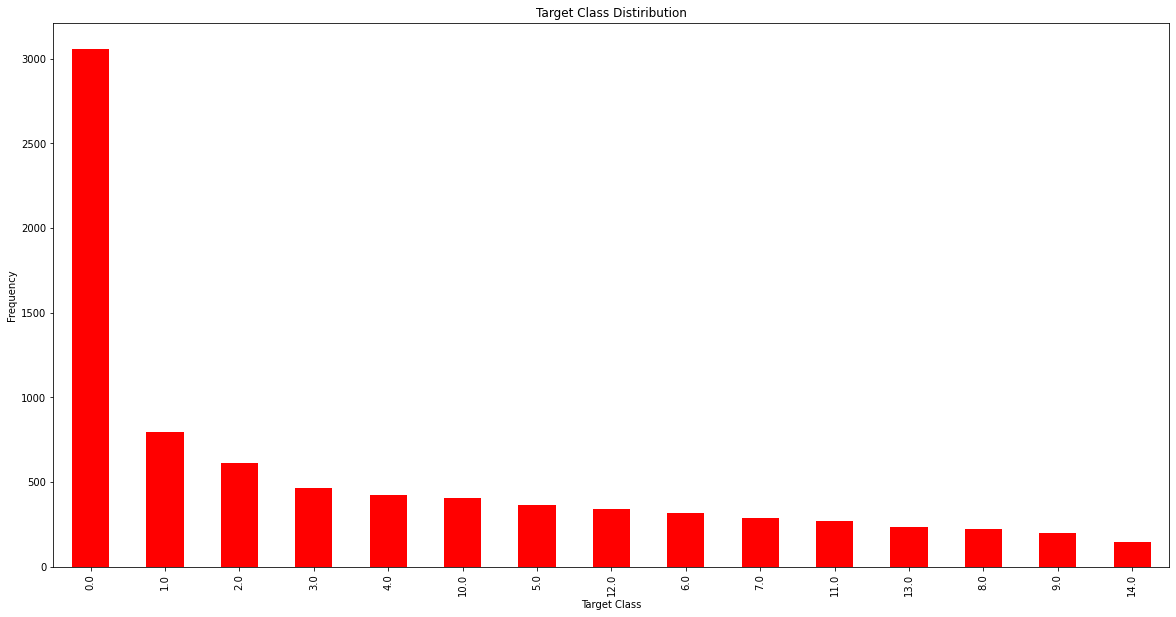

In [46]:
#plotting the above data
df["Q29_Encoded"].value_counts().plot(kind='bar', figsize= (20,10), color='r')
plt.xlabel("Target Class")
plt.ylabel("Frequency")
plt.title("Target Class Distiribution")
plt.savefig("targetclass distribution.png")

We can infer from the abve results and plot that almost 37.58% of the data belongs to class 0 and rest 63% is distributed among the other 14 classes. This makes it evident that the data is not balanced.

**Studying relationship between variables**

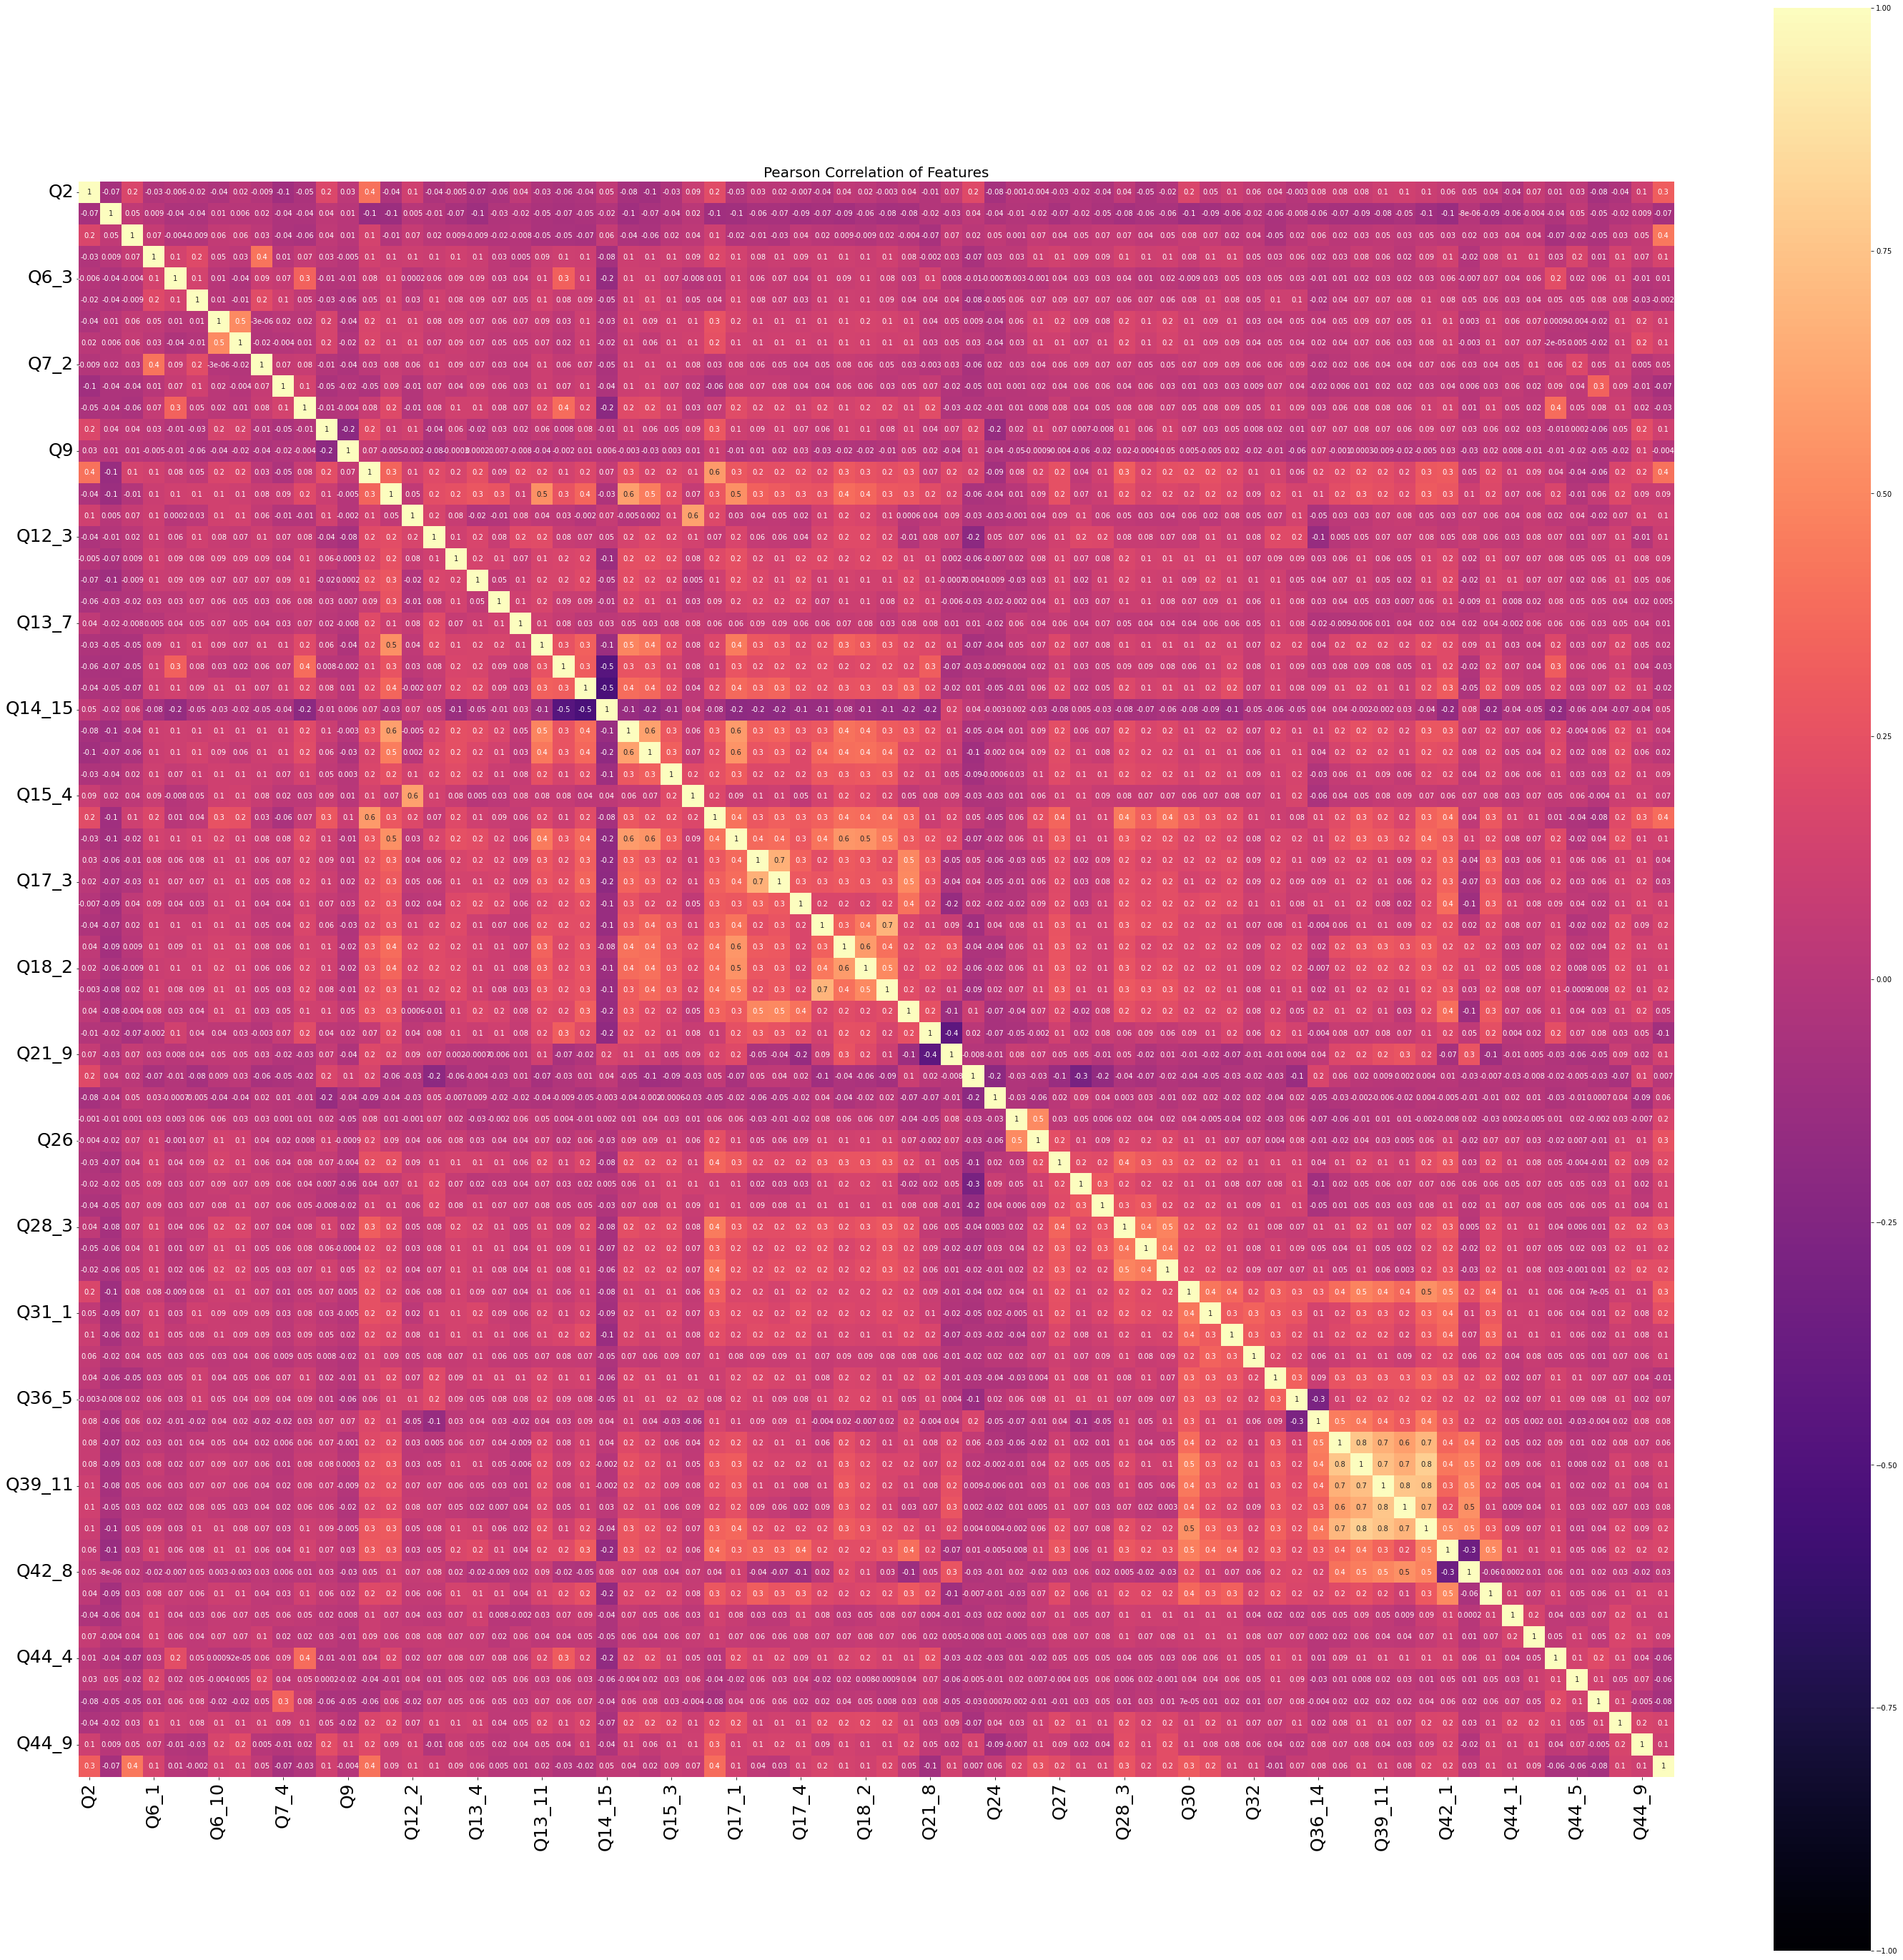

<Figure size 432x288 with 0 Axes>

In [47]:
#correlation plot
df=df.astype(int)

ax = sns.heatmap(df.corr(),annot=True, cbar= True, square= True, fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='magma')
fig=plt.gcf()
fig.set_size_inches(50,50)
ax.set_title("Pearson Correlation of Features", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()
plt.tight_layout()
plt.savefig("correlationplot.png", transparent = True)

This heatmap indicates the correlation between features where the color map  emphasizes low values with bright colors and high values with dark colors.


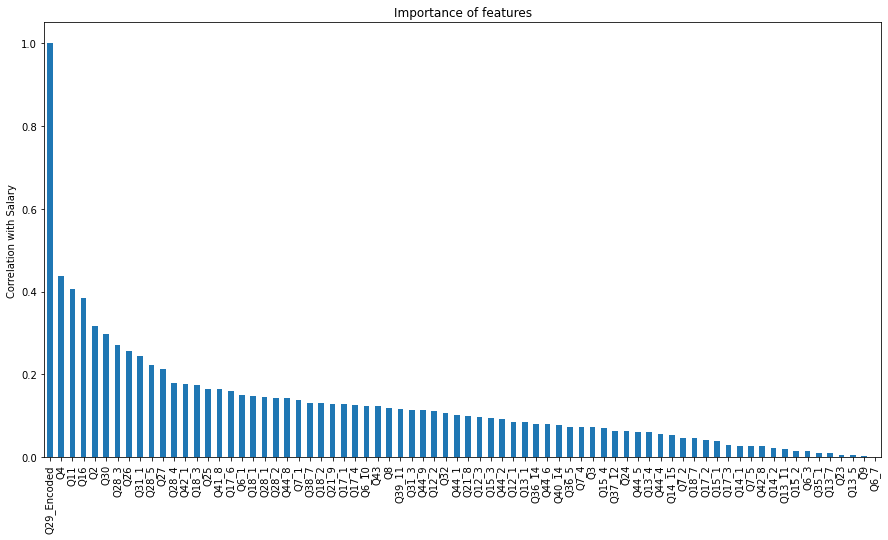

In [48]:
#calculating feature importance based on correlation 
corr_matrix = df.corr() #Computing the correlation matrix
sorted_corr = corr_matrix['Q29_Encoded'].abs().sort_values(ascending=False) #sorting the correlation matrix by the absolute values of the correlations
top_60_features = abs(sorted_corr)[:61]
#visualizing the correlations between features
ax = (sorted_corr.plot(kind="bar",figsize=(15,8),title="Importance of features"))
ax.set_ylabel('Correlation with Salary')
plt.show()

In [49]:
top_60_features 

Q29_Encoded    1.000000
Q4             0.437203
Q11            0.406746
Q16            0.385459
Q2             0.315812
                 ...   
Q7_2           0.046067
Q18_7          0.046065
Q17_2          0.040980
Q15_1          0.039356
Q17_3          0.029418
Name: Q29_Encoded, Length: 61, dtype: float64

 The height of the bar indicates the absolute value of the correlation between that feature and the target variable. The features are sorted in descending order of correlation strength, so the most important feature is at the top of the plot which is "Q4" with a correltion of almost 0.5, **indicating there is strongest correlation between the country of resisdence and annual salaries.** The four most important characteristics are "Country: Q4", "Years of experience in programming: Q11", "Years of experience in using ML methods : Q16" and "Age : Q2".


Futhermore, in order to do a feature selection, we do a chi-squared independence test on these categorical data where the null hypothesis is two variables are independent and alternate hypothesis is viceversa.

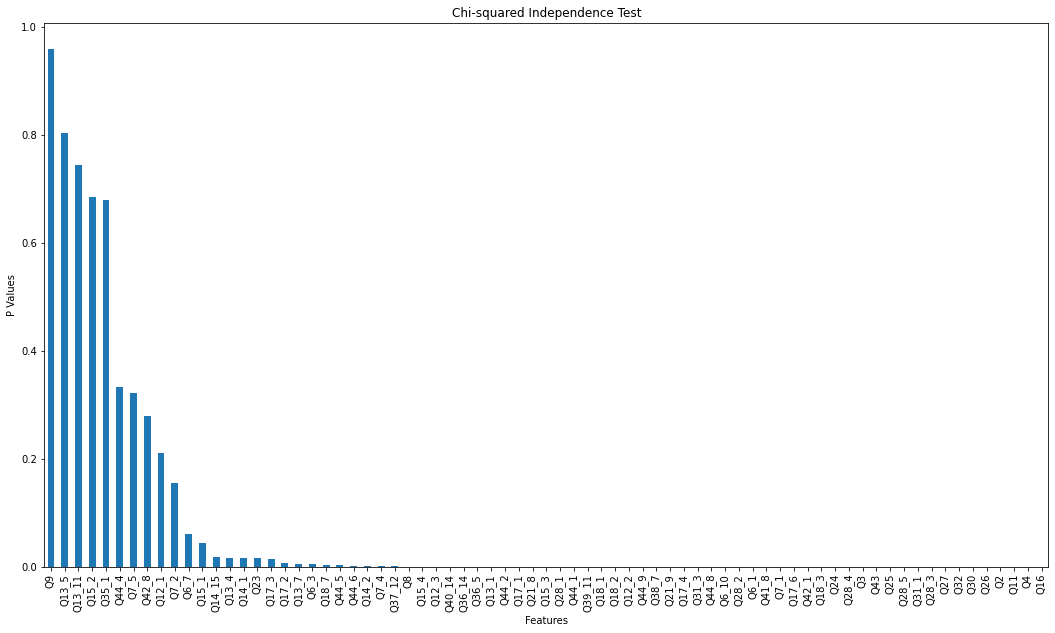

<Figure size 432x288 with 0 Axes>

In [50]:
#Feature selection based on chi-squared independence test

from sklearn.feature_selection import chi2

X = df.drop('Q29_Encoded',axis=1)
y = df["Q29_Encoded"]

chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(18,10))
p_values.plot.bar()

plt.title('Chi-squared Independence Test')
plt.xlabel('Features')
plt.ylabel('P Values')
plt.show()
plt.savefig("chisquared.png")

Reference for concept and code for chi-squared independence test: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223


Based on the above result, we see that 'Q9','Q13_5','Q13_11','Q15_2','Q35_1','Q44_4','Q7_5','Q42_8','Q12_1','Q7_2','Q6_7','Q15_1' have higher p-values than 0.05 and hence are statistically insignificant. So we can drop them before proceeding to our model.

In [51]:
#Based on the above plot we drop the columns that are not statistically significant
df.drop(['Q9','Q13_5','Q13_11','Q15_2','Q35_1','Q44_4','Q7_5','Q42_8','Q12_1','Q7_2','Q6_7','Q15_1'],axis=1,inplace=True)
df #Final dataframe for model implementation
     

,Q2,Q3,Q4,Q6_1,Q6_3,Q6_10,Q7_1,Q7_4,Q8,Q11,...,Q41_8,Q42_1,Q43,Q44_1,Q44_2,Q44_5,Q44_6,Q44_8,Q44_9,Q29_Encoded
1,8,0,15,1,1,0,0,0,1,5,...,1,1,2,1,0,1,0,1,0,2
2,3,0,16,1,0,0,1,1,2,5,...,0,0,0,1,1,0,1,1,0,10
3,10,0,2,1,1,0,0,0,4,6,...,1,0,0,0,1,0,0,0,0,10
4,5,0,55,1,1,0,1,0,4,5,...,1,1,2,1,1,0,0,1,0,13
5,5,0,55,1,0,0,1,0,3,5,...,1,1,4,0,0,0,0,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5,0,55,0,1,0,0,1,3,5,...,0,0,0,1,0,0,1,1,0,10
8133,4,0,20,0,0,0,0,1,3,2,...,1,0,0,0,0,0,1,0,0,0
8134,5,0,20,0,0,0,0,1,2,2,...,0,0,0,0,0,0,1,0,0,0
8135,2,0,51,0,0,0,0,1,3,1,...,1,0,0,1,0,0,1,0,0,2


At this point, all the functions have been converted to categorical data. To select the most relevant features, we can perform statistical tests that analyze the relationship between the features and the target variable, which is the annual compensation.

The chi-square test of independence is used to identify whether a relationship exists between categorical variables. In this test, the null hypothesis assumes that there is no association between the feature and the target salary variable, while the alternative hypothesis assumes the opposite. Any feature that is independent of the target variable is deemed irrelevant and hence is eliminated. Hence, a chi-square test is performed for each feature, using a significance level of 0.05. If the resulting p-value is less than 0.05, we reject the null hypothesis (H0) and consider the result to be significant, indicating a dependency between the two variables. On the other hand, if the p-value is greater than 0.05, we do not reject the null hypothesis (H0) and consider the result to be non-significant, indicating that there is no evidence of dependency between the two variables.

## **Part-3 Model Implementation**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [53]:
#Creating a feature dataframe and target vector
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

In [54]:
#Number of classes in target variable
y.unique()

array([ 2, 10, 13, 12,  9,  3,  0,  5, 11,  1,  8, 14,  7,  6,  4])

We see that there are 15 classes labelled from 0 to 14. So we need to do ordinal logisitic regression by doing binary logistic regression 14 times by ordering the classes from low to high. 

In [55]:
# Splitting data into train and test with 70%-30% train-test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [56]:
print(type(X_train),type(X_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [57]:
print(X_train.shape,X_test.shape)

(5695, 61) (2441, 61)


In [58]:
print(type(y_train),type(y_test))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [59]:
print(y_train.shape,y_test.shape)

(5695,) (2441,)


In [60]:
#defining function to conduct ordinal logistic regression
def ordinal(X_train, y_train, x_test,model):
    y = []
    p_0 = 0
    prob_list = []
    for j in range(0, 14):
      y = [] 
      for i in y_train:
        y.append(0 if i <= j else 1)
      model.fit(X_train, y)     
      p_pred = model.predict_proba(x_test)[:,0]
      p = p_pred - p_0 
      prob_list.append(p)
      p_0 = p_pred
    y = []
    for i in y_train:
        y.append(0 if i <= 13 else 1)
    model.fit(X_train, y)
    # probability for class 14
    p_pred_14 = model.predict_proba(x_test)[:,1]
    prob_list.append(p_pred_14)
    prob_best = np.argmax(prob_list, axis = 0)

    return prob_best 
     

Judging by the summary statistics in EDA section, I prefer to standardize the dataset to keep it more uniformed in order.

In [61]:
from sklearn.metrics import accuracy_score
binary_model = LogisticRegression(max_iter = 1000, class_weight="balanced")
accuracy = np.zeros(10)
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

np_idx= 0

scaler = StandardScaler()

#perform 10 fold cross validation 
for train_idx, val_idx in kfold.split(X_train): 
  #train and valid split
    X_train_1, X_val = X_train.values[train_idx], X_train.values[val_idx]
    y_train_1, y_val = y_train.values[train_idx], y_train.values[val_idx]
    
    #standardizing
    X_train_1 = scaler.fit_transform(X_train_1)
    X_val = scaler.fit_transform(X_val)
    
    #calling the function to predict the probabilities for 15 classes
    pro_best = ordinal(X_train_1, y_train_1, X_val,binary_model)
    acc = accuracy_score(pro_best, y_val)
   
    accuracy[np_idx] = acc*100
    np_idx +=1

    print("Fold {}: Accuracy: {}%".format(np_idx, round(acc,3))) 
    
print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.var(accuracy),3)))

Fold 1: Accuracy: 0.365%
Fold 2: Accuracy: 0.347%
Fold 3: Accuracy: 0.332%
Fold 4: Accuracy: 0.323%
Fold 5: Accuracy: 0.363%
Fold 6: Accuracy: 0.359%
Fold 7: Accuracy: 0.346%
Fold 8: Accuracy: 0.318%
Fold 9: Accuracy: 0.367%
Fold 10: Accuracy: 0.36%
Average Score: 34.803%(2.952%)


c = 0.0001, Average Score: 37.472%
c = 0.001, Average Score: 38.947%
c = 0.01, Average Score: 39.666%
c = 1, Average Score: 39.21%
c = 10, Average Score: 39.175%
c = 100, Average Score: 39.175%
c = 1000, Average Score: 39.175%
Respective bias for parameter C = [0.0001,0.001,0.01,0.1,1,10,100,1000]:  [-0.373648815020006, -0.7535537088334874, -1.0103847337642353, -1.3024573714989232, -1.3941089566020317, -1.9122386881015019, -1.9456438851450002, -2.3750776341141475, -2.558215813203043, -3.1947464638990812]
Respective variance for parameter C = [0.0001,0.001,0.01,0.1,1,10,100,1000]:  [1.9964558325638655, 4.053729147429978, 5.9610864881502, 7.879124038165591, 9.86516158818098, 11.848669175567974, 13.747627975423422, 15.839100388715943, 17.82469902474684, 19.933988902156415]


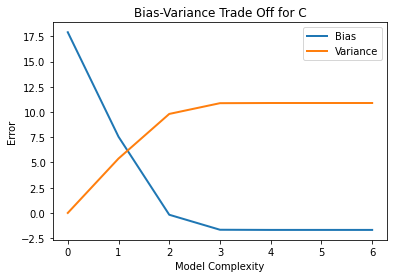

<Figure size 432x288 with 0 Axes>

In [62]:
#Plotting Bias-Variance Trade off plot

import statistics 
from statistics import mean

bias_mean_list=[]
var_mean_list=[]
C = [0.0001,0.001,0.01,1,10,100,1000]
for c in C: 
    np_idx = 0
    bias_c = np.zeros(10)
    variance_c = np.zeros(10)
    mse_c = np.zeros(10)
    model = LogisticRegression(C=c) #tuning this parameter with unbalanced data at this point
    bias_list = []
    var_list = []
    

    #perform 10 fold cross validation 
    for train_idx, val_idx in kfold.split(X_train): #split the training set into new train and validation set
      X_train_2, X_val_2 = X_train.values[train_idx], X_train.values[val_idx]
      y_train_2, y_val_2= y_train.values[train_idx], y_train.values[val_idx]
    
   #standardization
      X_train_2 = scaler.fit_transform(X_train_2)
      X_val_2 = scaler.fit_transform(X_val_2)

    #calling the function to predict the probabilities for 15 classes
      pro_best = ordinal(X_train_2, y_train_2, X_val_2,model)
      mse_c[np_idx] = np.mean((y_val_2 - pro_best)**2)
      variance_c[np_idx] = np.var(pro_best)
      bias_c[np_idx] = mse_c[np_idx] - variance_c[np_idx] #from definition
     #preparing list for bias and variance
      bias_list.append(bias_c.mean())
      var_list.append(variance_c.mean())
      #calculating accuracy for each c
      acc = accuracy_score(pro_best, y_val_2)
      accuracy[np_idx] = acc*100

      np_idx = np_idx + 1
      
    #collecting mean bias and variance for each C value
    bias_mean_list.append(mean(bias_list))
    var_mean_list.append(mean(var_list)) 

    print("c = {}, Average Score: {}%".format(c, round(np.mean(accuracy),3)))
    
#plotting
print("Respective bias for parameter C = [0.0001,0.001,0.01,0.1,1,10,100,1000]: ",bias_list)
print("Respective variance for parameter C = [0.0001,0.001,0.01,0.1,1,10,100,1000]: ",var_list)

C = [0.0001,0.001,0.01,0.1,1,10,100,1000]
plt.plot(bias_mean_list, label="Bias",linewidth = 2)
plt.plot(var_mean_list, label="Variance", linewidth = 2)
plt.title("Bias-Variance Trade Off for C")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()

plt.show()
plt.savefig("bias-variance tradeoff.png")

As model complexity increases, bias decreases and variance increases. The optimal model is the point where bias and variance interact with each other which is around a model complexity of 1. Judging from the accuracy values, that exact best model seems to be the model with C = 0.01 with 39.66 % accuracy.

## **Part-4 Model Tuning**

Various hyperparameters that can be tuned in ordinal logistic regression model are penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs, and l1_ratio.

Here, we select to perform the tuning for two parameters which is : C and Solver.

In [63]:
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
model_tune = LogisticRegression()

accuracy_best = 0
f1_score_best = 0
std_best_accuracy = 0
std_best_f1_score = 0
model_best = model_tune
params_best = {}




for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]: #tuning C futher with more wide range of values
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model_tune = LogisticRegression(C=C, solver=solver, class_weight = "balanced")
        accuracy = np.zeros(10)
        f1_s = np.zeros(10)

        np_idx = 0
        
        for train_idx, val_idx in kfold.split(X_train):
          #split the training set into new train and validation set
          X_train_3, X_val_3 = X_train.values[train_idx], X_train.values[val_idx]
          y_train_3, y_val_3 = y_train.values[train_idx], y_train.values[val_idx]
          X_train_3 = scaler.fit_transform(X_train_3)
          X_val_3 = scaler.fit_transform(X_val_3)

          predictions = ordinal(X_train_3, y_train_3, X_val_3,model)
          acc = accuracy_score(predictions, y_val_3)
          accuracy[np_idx] = acc*100
          f1s = f1_score(predictions, y_val_3, average = 'micro')
          f1_s[np_idx]= f1s
          
         
          np_idx += 1
        
        if np.mean(accuracy) > accuracy_best:
            model_best = model_tune
            params_best = {'C':C, 'solver':solver}
            accuracy_best = np.mean(accuracy)
            std_best_accuracy = np.std(accuracy)
            f1_score_best = np.mean(f1_s)
            std_best_f1_score = np.std(f1_s)
            

print (params_best)
print ("Best Accuracy Score: {}%({}%)".format(round(accuracy_best,2),round(std_best_accuracy,2))) 
print ("Best F1 Score: {}%({}%)".format(round(f1_score_best,2),round(std_best_f1_score,2))) 

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(params_best['C'],params_best['solver'],round(accuracy_best,2),round(std_best_accuracy,2)))
     

{'C': 0.001, 'solver': 'newton-cg'}
Best Accuracy Score: 39.17%(2.08%)
Best F1 Score: 0.39%(0.02%)

The optimal log model uses C=0.001, and a newton-cg solver, and has a cross validation score of 39.17% with a standard deviation of 2.08%


We do a gridsearch on various C values and solver choices and find that for **C = 0.01** and a **solver of newton-cg** our model gives us the **best accuracy of 39.71% and a F1 score of 0.39%.**
Even though overall the model is not performing well, our assessment in previous section is still validated as our best C is 0.01. For solvers, the best solver seems to be newton-cg for this dataset.

C is the inverse of regularization strength, which controls the amount of regularization applied to the model. A smaller value of C will result in stronger regularization, and a larger value of C will result in weaker regularization. Regularization helps to prevent overfitting by penalizing large coefficients in the model. In other words, a lower value of C will lead to a simpler model, and a higher value of C will lead to a more complex model. In our case we have a relatively lower C value of 0.01


Solver determines the algorithm used in the optimization process to find the coefficients of the logistic regression model. The choice of solver depends on the size of the data set and the complexity of the model. We know that newton-cg is suitable for multi-class classification problem and hence it makes sense that the after tuning we get best performance with newton-cg solver. It is a quasi-Newton method that uses a truncated Newton method to solve the optimization problem. It approximates the Hessian matrix using only first-order information and iteratively refines the solution until convergence. 






In [64]:
bestmodel = LogisticRegression(C = 0.01, solver = 'newton-cg', max_iter = 1000, class_weight="balanced")
bestmodel.fit(X_train,y_train)
coef = abs(bestmodel.coef_)
importance = np.zeros(coef.shape[1])
for i in range(40):
    importance[i] = np.mean(coef[:, i])
importance

array([0.08920975, 0.03581753, 0.02559998, 0.07852547, 0.06057223,
       0.06185281, 0.04280759, 0.05600232, 0.05095777, 0.10536926,
       0.03563538, 0.05305771, 0.04106422, 0.04328746, 0.07009873,
       0.04264307, 0.07791108, 0.03754433, 0.05094804, 0.03633691,
       0.06786403, 0.05523816, 0.06739897, 0.06237128, 0.0654337 ,
       0.05074018, 0.03566457, 0.03882869, 0.04077618, 0.056415  ,
       0.06332225, 0.04450921, 0.013922  , 0.02390401, 0.06815941,
       0.0560412 , 0.05040077, 0.05302965, 0.06415173, 0.07681941,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [65]:
# Combining features with its coefficients, rank the importance.
final_importance = pd.Series(importance, top_60_features.index)
final_importance = final_importance.sort_values(ascending = False)
final_importance

Q28_5          0.105369
Q29_Encoded    0.089210
Q16            0.078525
Q17_6          0.077911
Q15_3          0.076819
                 ...   
Q36_14         0.000000
Q13_1          0.000000
Q12_1          0.000000
Q44_2          0.000000
Q17_3          0.000000
Length: 61, dtype: float64

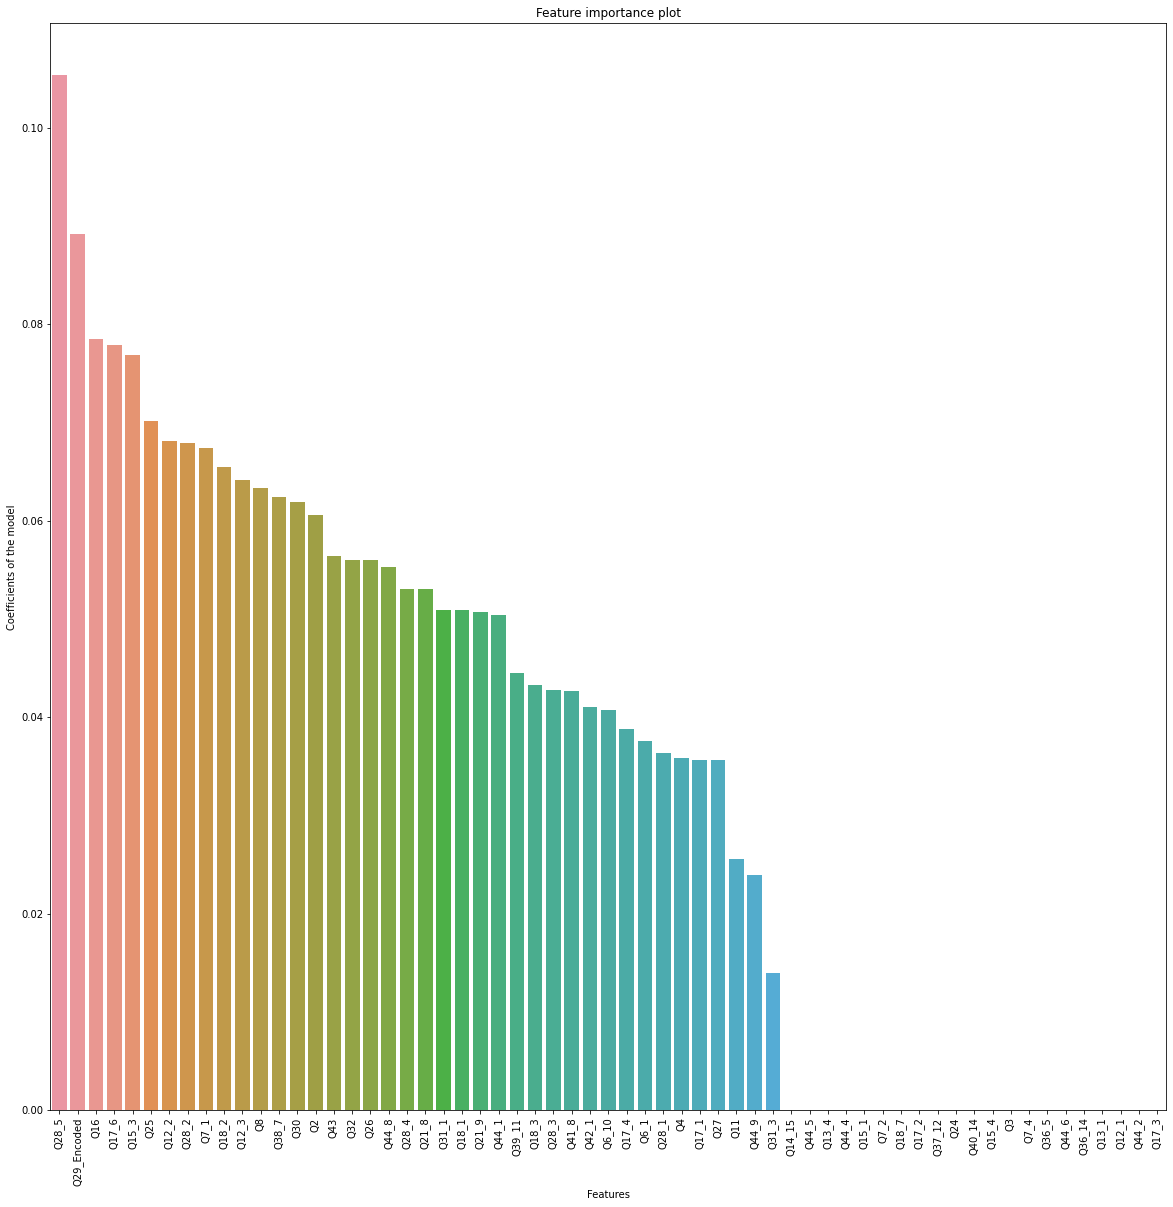

In [66]:
ax = sns.barplot(x=final_importance.index, y = final_importance.values, data=final_importance, order = final_importance)
ax.set_xticklabels(final_importance.index,rotation = 90)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Feature importance plot')
plt.xlabel('Features')
plt.ylabel('Coefficients of the model')
plt.savefig('f7.png',transparent = True)
plt.show()

We see now that unlike part-2 where the important features were Q4, Q11, Q16 and Q2 , in this case we have Q28_5, Q16, Q17_6 and Q15_3 as the important features in that order.

## **Part-5 Testing and Discussion**

In [67]:
#testing on my best model
bestmodel = LogisticRegression(C = 0.01, solver = 'newton-cg', max_iter = 1000, class_weight = "balanced")
prob_test = ordinal(X_train, y_train, X_test, bestmodel)
accuracy_test = accuracy_score(y_test, prob_test)
print("For test set accuracy is :",accuracy_test)

For test set accuracy is : 0.34985661614092584


Train set vs Test set:

For train set , accuracy = 39.71%\
For test set, accuracy = 34.98%

Since both the train accuracy and test accuracy are considerable low (below 40%) and also the test accuracy is lower than the train accuracy, the model is underfitting with the dataset. 

In order to improve accuracy of the model, we already have done feature engineering and hyperparameter tuning of the model. So the next logical conclusion is to get more sample size of data. With more meaningful data, the accuracy can definitely improve.

In [68]:
#prediction
bestmodel = LogisticRegression(C = 0.01, solver = 'newton-cg', max_iter = 1000, class_weight="balanced")
bestmodel.fit(X_train,y_train)
pred_train= bestmodel.predict(X_train)
pred_test = bestmodel.predict(X_test)

Text(0, 0.5, 'Distribution')

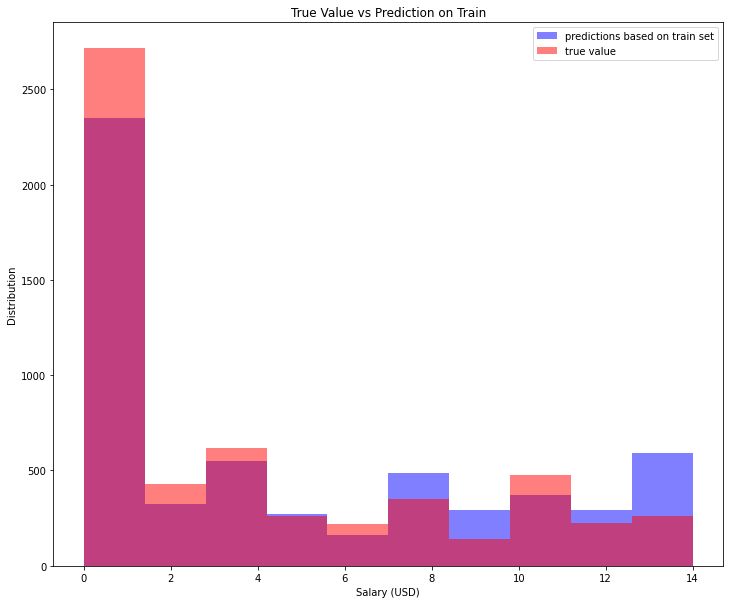

In [69]:
#Plot the distribution of true target variable values and their predictions on both the training set and test set
plt.figure(figsize=(12,10))
plt.hist(pred_train,label='predictions based on train set',alpha=0.5, color='b')
plt.hist(y_train,label='true value',alpha=0.5, color='r')
plt.legend()
plt.title("True Value vs Prediction on Train")
plt.xlabel("Salary (USD)")
plt.ylabel("Distribution")

Text(0, 0.5, 'Distribution')

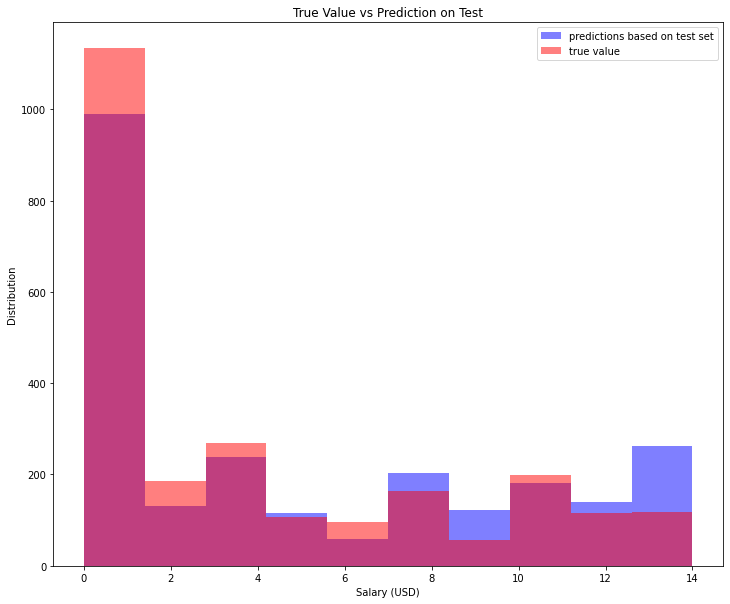

In [70]:
plt.figure(figsize=(12,10))
plt.hist(pred_test,label='predictions based on test set',alpha=0.5, color='b')
plt.hist(y_test,label='true value',alpha=0.5, color='r')
plt.legend()
plt.title("True Value vs Prediction on Test")
plt.xlabel("Salary (USD)")
plt.ylabel("Distribution")

If we look at the y-axis values for both plots, we see that even though the ditribution between true values and prediction is more or less similar for training and test values, but we analyse that the prediction for train set has higher values particularly for class 0, 4, 10 ans 12. While the prediction for test values are lower in value compared to train case. There is significantly more weight in class 0 in both the predictions.